In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#cargamos el dataframe
AccesoInternet = pd.read_csv('datos/AccesosaInternetfijoporvelocidaddebajadaylocalidad.csv',  sep=',')

In [ ]:
#informacion general
AccesoInternet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

In [4]:
#Calculamos la cantidad de datos nulos
AccesoInternet.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2142
              ... 
85 mbps       3097
90 mbps       3096
92 mbps       3096
95 mbps       3097
100 mbps      2545
Length: 83, dtype: int64

# **Resumen Estadístico**

In [ ]:
#Analisis estadístico las variables númericas
analisis = round(AccesoInternet.describe(include=[np.number]),0)
analisis

,"0,256 mbps","0,375 mbps","0,512 mbps","0,625 mbps","1,25 mbps","2,2 mbps","2,5 mbps","3,3 mbps","4,5 mbps","6,4 mbps",...,65 mbps,66 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps
count,29.0,1.0,524.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,...,2.0,1.0,1.0,16.0,1.0,1.0,1.0,2.0,2.0,1.0
mean,3.0,225.0,2.0,111.0,25.0,26.0,60.0,6.0,65.0,13.0,...,7.0,1.0,2.0,175.0,1.0,1.0,14.0,2.0,2.0,1.0
std,6.0,NaN,5.0,NaN,NaN,NaN,48.0,NaN,NaN,NaN,...,8.0,NaN,NaN,301.0,NaN,NaN,NaN,1.0,1.0,NaN
min,1.0,225.0,1.0,111.0,25.0,26.0,25.0,6.0,65.0,13.0,...,1.0,1.0,2.0,1.0,1.0,1.0,14.0,1.0,1.0,1.0
25%,1.0,225.0,1.0,111.0,25.0,26.0,32.0,6.0,65.0,13.0,...,4.0,1.0,2.0,7.0,1.0,1.0,14.0,2.0,1.0,1.0
50%,1.0,225.0,1.0,111.0,25.0,26.0,40.0,6.0,65.0,13.0,...,7.0,1.0,2.0,30.0,1.0,1.0,14.0,2.0,2.0,1.0
75%,3.0,225.0,1.0,111.0,25.0,26.0,77.0,6.0,65.0,13.0,...,10.0,1.0,2.0,115.0,1.0,1.0,14.0,2.0,2.0,1.0
max,31.0,225.0,61.0,111.0,25.0,26.0,114.0,6.0,65.0,13.0,...,13.0,1.0,2.0,952.0,1.0,1.0,14.0,3.0,2.0,1.0


In [ ]:
#Analisis estadístico de las variables categoricas
AccesoInternet.describe(include=object)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,5 mbps","0,75 mbps",1 mbps,"1,5 mbps",2 mbps,...,20 mbps,24 mbps,25 mbps,30 mbps,40 mbps,50 mbps,60 mbps,70 mbps,75 mbps,100 mbps
count,3098,3098,3098,3098,956,643,284,931,16,741,...,1053,14,580,693,92,645,257,10,227,553
unique,24,432,2801,2679,235,32,82,216,15,231,...,311,13,321,296,39,447,241,7,201,431
top,BUENOS AIRES,San Justo,Otros,Sin Datos,1,1,2,1,47,1,...,1,2,1,1,1,1,1,1,1,1
freq,712,55,74,77,279,367,37,147,2,83,...,170,2,29,116,31,55,5,3,5,44


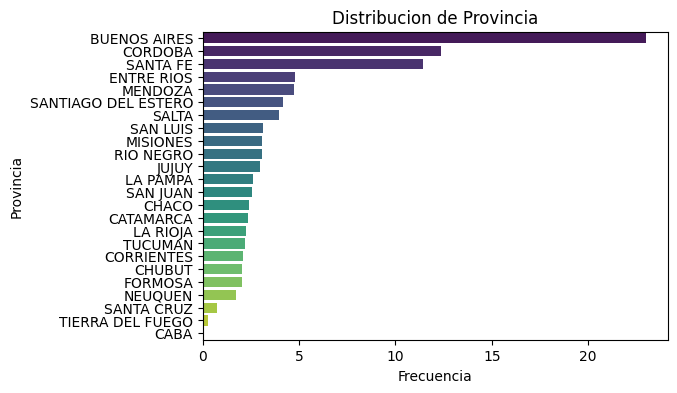

In [ ]:
# Calcula las frecuencias relativas
frec_relativa = 100 * AccesoInternet['Provincia'].value_counts() / len(AccesoInternet['Provincia'])

# Crea el gráfico utilizando Seaborn
plt.figure(figsize=(6, 4))
ax = sns.barplot(y=frec_relativa.index, x=frec_relativa.values, palette="viridis")  # Intercambia y y x

# Configura los títulos y etiquetas
plt.title('Distribucion de Provincia')
plt.xlabel('Frecuencia')  # Los ejes se invierten, por lo que se cambian los labels
plt.ylabel('Provincia')  # Los ejes se invierten, por lo que se cambian los labels

# Gira los labels en el eje y (anteriormente x)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Muestra el gráfico
plt.show()


> En el daset anterior podemos apreciar las diferentes velocidades de internet medias en Mbps (megabits por Segundo), como se puede apreciar van desde 0,256 mbps hasta 100 mbps, por otra parte la mayor parte de estos datos tienen valores perdidos o nan, se observa ademas datos de la Provincia, Partido, Localidad y Link Indec no poseen valores nan.

In [ ]:
Conectividad = pd.read_csv('/content/drive/MyDrive/Proyecto3/ConectividadalserviciodeInternet_2.csv')

In [ ]:
#informacion general
Conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [ ]:
Conectividad.isnull().sum()

Provincia         0
Partido           0
Localidad         0
Poblacion         0
ADSL              0
CABLEMODEM        0
DIALUP            0
FIBRAOPTICA       0
SATELITAL         0
WIRELESS          0
TELEFONIAFIJA     0
3G                0
4G                0
link             12
Latitud           0
Longitud          0
dtype: int64

# **Resumen Estadístico**

In [ ]:
#Analisis estadístico las variables númericas
analisis = round(Conectividad.describe(include=[np.number]),0)
analisis

,Poblacion,link
count,4312.0,4300.0
mean,8693.0,39098723.0
std,38215.0,29393046.0
min,0.0,2000010.0
25%,116.0,10091040.0
50%,576.0,34010530.0
75%,3202.0,66126022.0
max,1317298.0,94014020.0


In [ ]:
#Analisis estadístico de las variables categoricas
Conectividad.describe(include=object)

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,Latitud,Longitud
count,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312
unique,24,444,3912,2,2,2,2,2,2,2,2,2,4260,4259
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,--,SI,SI,--,SI,"-28,5555816291232","-67,1592836516078"
freq,901,85,12,3179,3436,3909,2866,3233,2242,2162,2432,2574,4,4


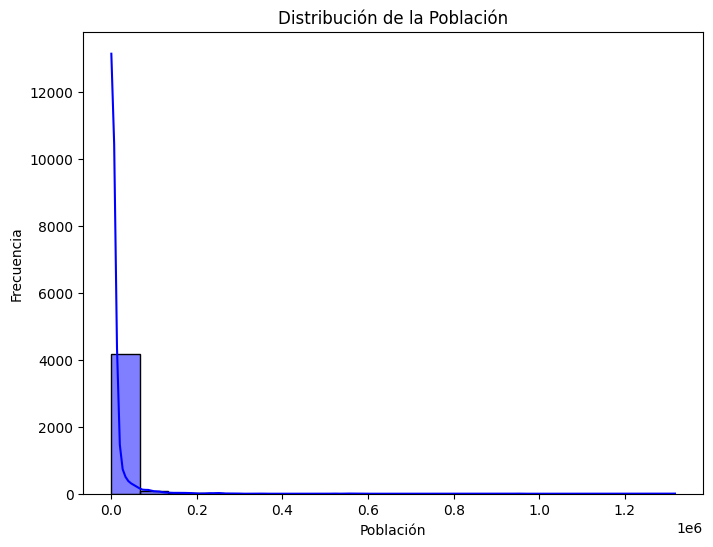

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=Conectividad, x='Poblacion', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de la Población')
plt.xlabel('Población')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()


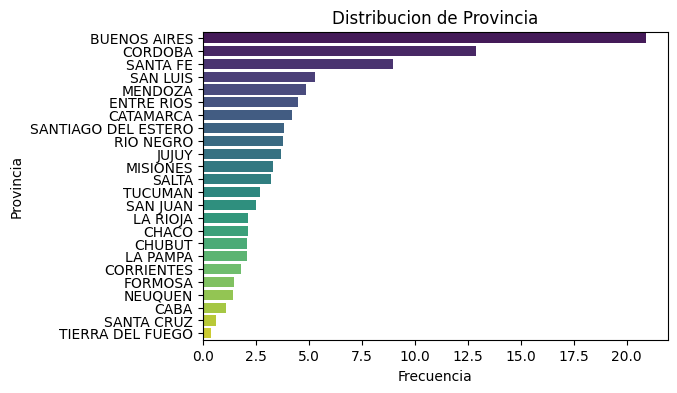

In [ ]:
# Calcula las frecuencias relativas
frec_relativa = 100 * Conectividad['Provincia'].value_counts() / len(Conectividad['Provincia'])

# Crea el gráfico utilizando Seaborn
plt.figure(figsize=(6, 4))
ax = sns.barplot(y=frec_relativa.index, x=frec_relativa.values, palette="viridis")  # Intercambia y y x

# Configura los títulos y etiquetas
plt.title('Distribucion de Provincia')
plt.xlabel('Frecuencia')  # Los ejes se invierten, por lo que se cambian los labels
plt.ylabel('Provincia')  # Los ejes se invierten, por lo que se cambian los labels

# Gira los labels en el eje y (anteriormente x)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Muestra el gráfico
plt.show()

> En el dataset anterior se observan los datos para el año, trimestre, periodo y los tipos de acceso a internet fijo por tecnología (ADSL, Cablemodem, Fibra óptica, Wireless, Otros), latitud y longitud, los datos no tiene valores perdidos. De acuerdo con el análisis anterior las provincias que más posee registros es Buenos Aires, el Partido que más aparece es General Roca y la Localidad San Pedro.

In [5]:
AccesosTec = pd.read_csv('datos/Internet_Accesos-por-tecnologia.csv')

In [6]:
AccesosTec['ADSL'] = AccesosTec['ADSL'].str.replace('.', '').astype(float)

In [109]:
AccesosTec['Cablemodem'] = AccesosTec['Cablemodem'].str.replace('.', '').astype(float)

In [110]:
AccesosTec['Fibra óptica'] = AccesosTec['Fibra óptica'].str.replace('.', '').astype(float)

In [111]:
AccesosTec['Total'] = AccesosTec['Total'].str.replace('.', '').astype(float)

In [112]:
AccesosTec['Año'] = AccesosTec['Año'].astype(str)

In [113]:
AccesosTec['Trimestre'] = AccesosTec['Trimestre'].astype(str)

In [114]:
AccesosTec['Año'] = AccesosTec['Año'].astype(str)

In [ ]:
#informacion general
AccesosTec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     object 
 1   Trimestre     35 non-null     object 
 2   ADSL          35 non-null     float64
 3   Cablemodem    35 non-null     float64
 4   Fibra óptica  35 non-null     float64
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     float64
 8   Periodo       35 non-null     object 
dtypes: float64(6), object(3)
memory usage: 2.6+ KB


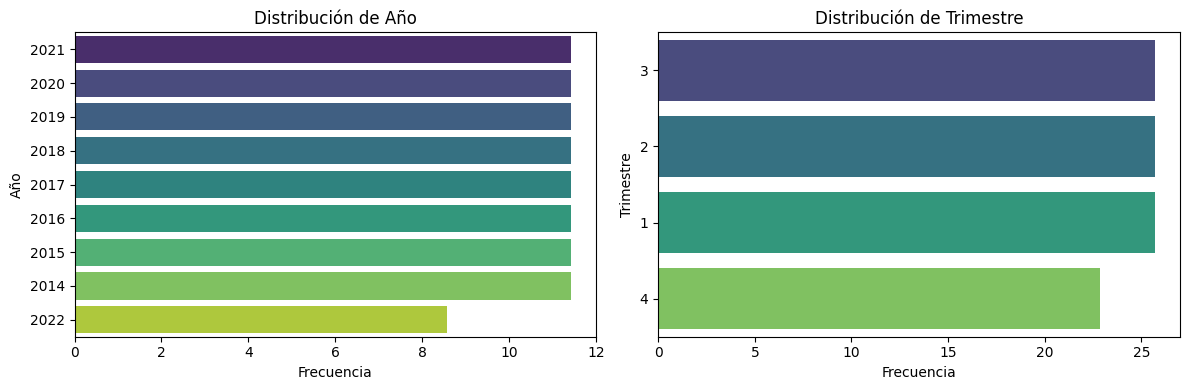

In [115]:
# Calcula las frecuencias relativas para el primer gráfico
frec_relativa_año = 100 * AccesosTec['Año'].value_counts() / len(AccesosTec['Año'])

# Calcula las frecuencias relativas para el segundo gráfico
frec_relativa_trimestre = 100 * AccesosTec['Trimestre'].value_counts() / len(AccesosTec['Trimestre'])

# Crea la matriz de gráficos
plt.figure(figsize=(12, 4))

# Primer gráfico en la primera posición (1, 1)
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=frec_relativa_año.index, x=frec_relativa_año.values, palette="viridis")
plt.title('Distribución de Año')
plt.xlabel('Frecuencia')
plt.ylabel('Año')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Segundo gráfico en la segunda posición (1, 2)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=frec_relativa_trimestre.index, x=frec_relativa_trimestre.values, palette="viridis")
plt.title('Distribución de Trimestre')
plt.xlabel('Frecuencia')
plt.ylabel('Trimestre')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

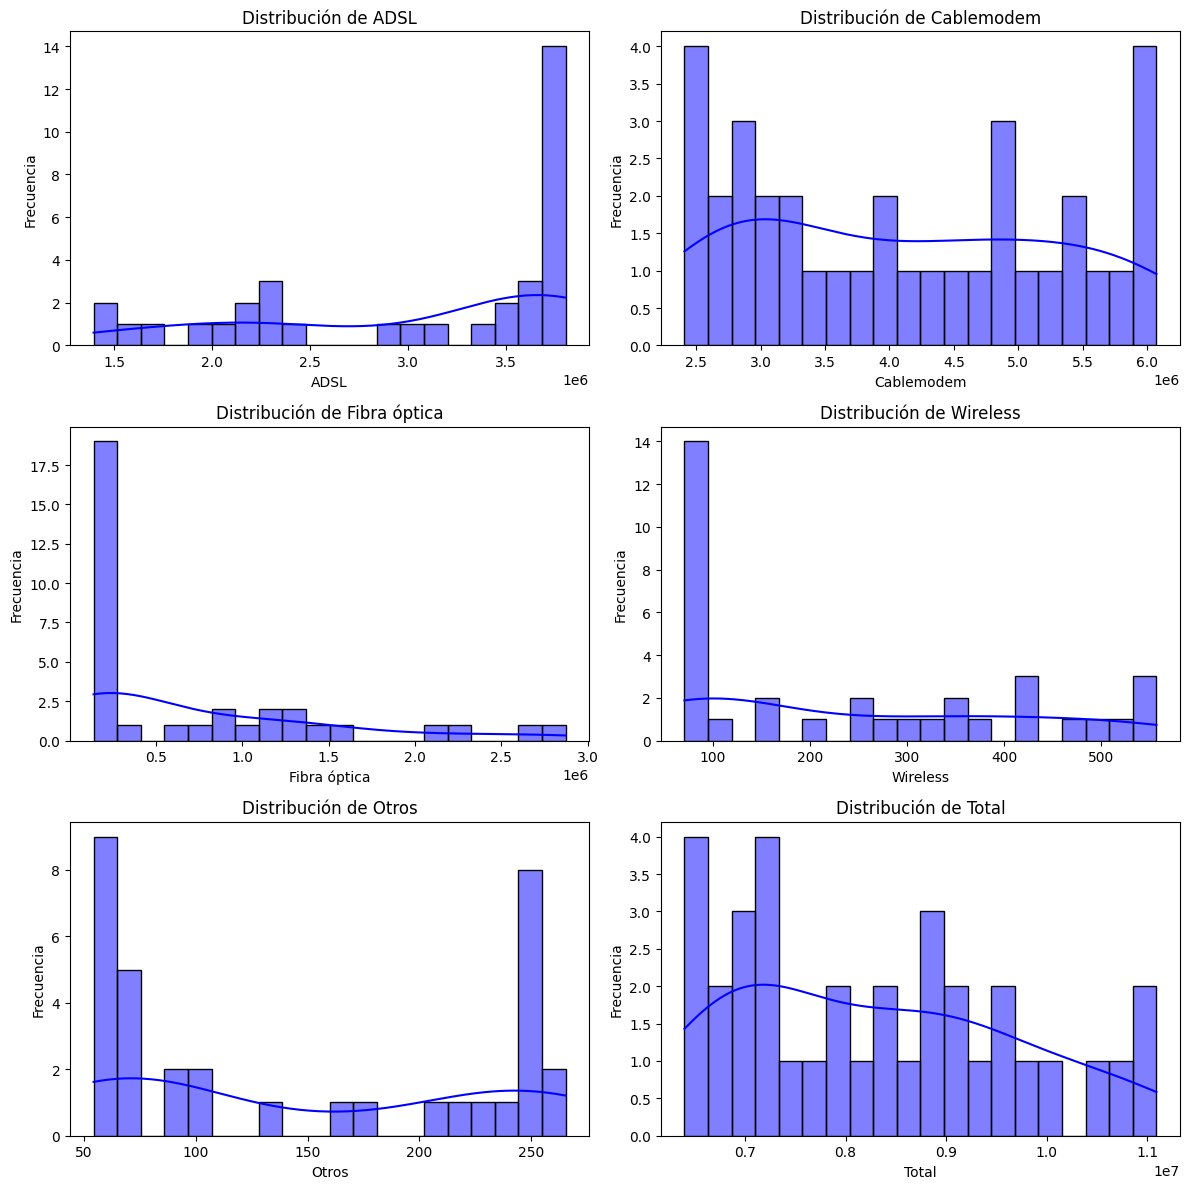

In [116]:
# Crea la matriz de gráficos
plt.figure(figsize=(12, 12))

# Nombres de las columnas para los histogramas
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

# Itera sobre las columnas para crear los histogramas
for i, columna in enumerate(columnas, 1):
    plt.subplot(3, 2, i)  # 3 filas, 2 columnas, posición actual
    sns.histplot(data=AccesosTec, x=columna, bins=20, kde=True, color='blue')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

> En el dataset anterior se observan los datos para el año, trimestre, periodo y los tipos de acceso a internet fijo por tecnología (ADSL, Cablemodem, Fibra óptica, Wireless, Otros), los datos no tiene valores perdidos, adicionalmente las variables numéricas NO corresponden a una distribución normal, como se observa en las gráficas de distribución de frecuencia anteriores.

# **Resumen Estadístico**

In [ ]:
#Analisis estadístico las variables númericas
analisis = AccesosTec.describe(include=[np.number])
round(analisis,0)

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,35.0,35.0,35.0,35.0,35.0,35.0
mean,3040425.0,4122601.0,739063.0,248.0,147.0,8297800.0
std,835412.0,1225277.0,786177.0,174.0,86.0,1399611.0
min,1395277.0,2407330.0,139187.0,71.0,54.0,6398398.0
25%,2279711.0,2966749.0,167988.0,85.0,63.0,7057455.0
50%,3557216.0,4038141.0,226285.0,194.0,101.0,8110444.0
75%,3723156.0,5132233.0,1138802.0,395.0,248.0,9260442.0
max,3803024.0,6073426.0,2871541.0,557.0,265.0,11091128.0


In [ ]:
#Analisis estadístico de las variables categoricas
AccesosTec.describe(include=object)

,Año,Trimestre,Periodo
count,35,35,35
unique,9,4,35
top,2021,3,Jul-Sept 2022
freq,4,9,1


> Observando el análisis estadístico anterior notamos que no hay datos nulos en el conjunto de datos, aparecen los datos para la desviación estándar de cada variable y los cuartiles, ninguno de los datos numéricos se comportan de acuerdo con la distribución normal. Por otra parte, la mayor parte de los datos pertenecen al año 2021 y al cuarto trimestre del año.

# **Correlación entre las variables**

In [ ]:
matriz = round(AccesosTec.corr(),2)
matriz

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
ADSL,1.00,-0.94,-0.97,-0.98,-0.90,-0.95
Cablemodem,-0.94,1.00,0.89,0.98,0.92,0.99
Fibra óptica,-0.97,0.89,1.00,0.94,0.81,0.93
Wireless,-0.98,0.98,0.94,1.00,0.93,0.98
Otros,-0.90,0.92,0.81,0.93,1.00,0.90
Total,-0.95,0.99,0.93,0.98,0.90,1.00


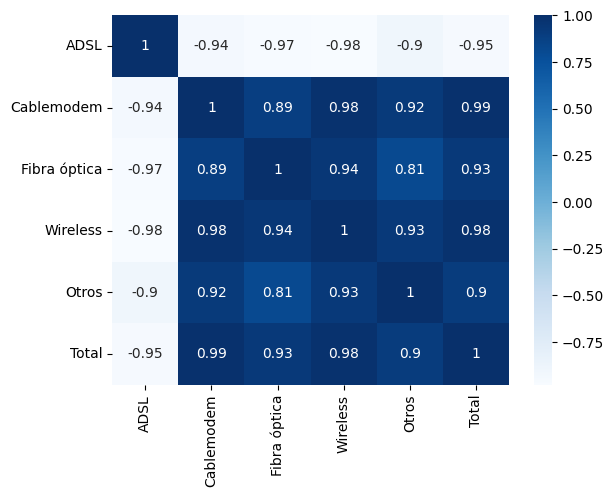

In [ ]:
sns.heatmap(matriz, cmap='Blues', annot=True);

> La correlación entre las variables numéricas del conjunto de datos en general es fuerte, como se observa en el mapa de calor anterior.

In [117]:
InternetAcc = pd.read_csv('/content/drive/MyDrive/Proyecto3/Internet_Accesos-por-velocidad.csv')

In [122]:
InternetAcc['Año'] = InternetAcc['Año'].astype(str)

In [121]:
InternetAcc['Trimestre'] = InternetAcc['Trimestre'].astype(str)

In [118]:
InternetAcc ['+ 1 Mbps - 6 Mbps'] = InternetAcc['+ 1 Mbps - 6 Mbps'].str.replace('.', '').astype(float)

In [119]:
InternetAcc['+ 30 Mbps'] = InternetAcc['+ 30 Mbps'].str.replace('.', '').astype(float)

In [120]:
InternetAcc['Total'] = InternetAcc['Total'].str.replace('.', '').astype(float)

In [123]:
#informacion general
InternetAcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    object 
 1   Trimestre            840 non-null    object 
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    float64
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    float64
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    float64
dtypes: float64(9), object(3)
memory usage: 78.9+ KB


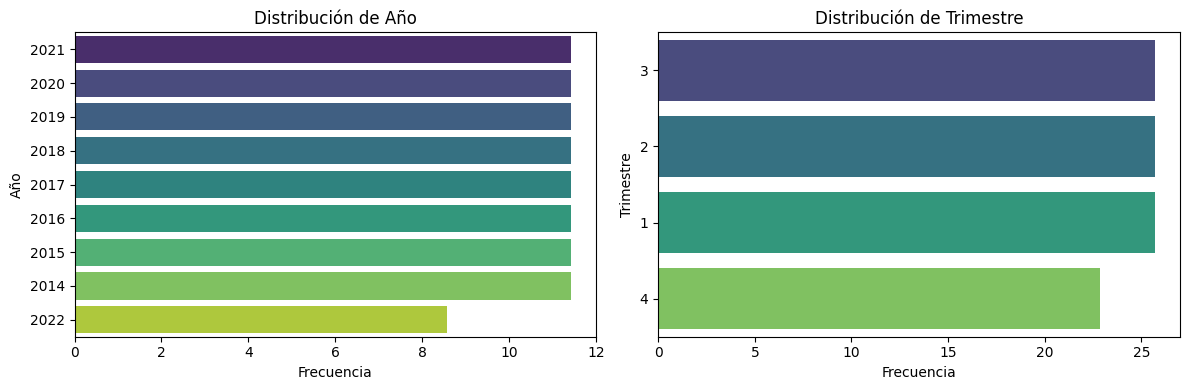

In [124]:
# Calcula las frecuencias relativas para el primer gráfico
frec_relativa_año = 100 * InternetAcc['Año'].value_counts() / len(InternetAcc['Año'])

# Calcula las frecuencias relativas para el segundo gráfico
frec_relativa_trimestre = 100 * InternetAcc['Trimestre'].value_counts() / len(InternetAcc['Trimestre'])

# Crea la matriz de gráficos
plt.figure(figsize=(12, 4))

# Primer gráfico en la primera posición (1, 1)
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=frec_relativa_año.index, x=frec_relativa_año.values, palette="viridis")
plt.title('Distribución de Año')
plt.xlabel('Frecuencia')
plt.ylabel('Año')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Segundo gráfico en la segunda posición (1, 2)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=frec_relativa_trimestre.index, x=frec_relativa_trimestre.values, palette="viridis")
plt.title('Distribución de Trimestre')
plt.xlabel('Frecuencia')
plt.ylabel('Trimestre')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

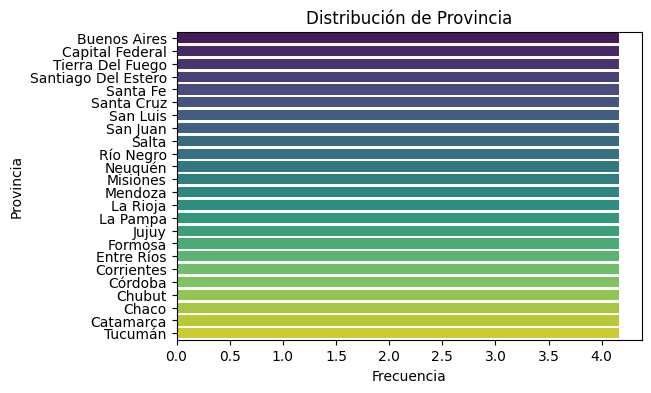

In [ ]:
# Calcula las frecuencias relativas
frec_relativa = 100 * InternetAcc['Provincia'].value_counts() / len(InternetAcc['Provincia'])

# Crea el gráfico utilizando Seaborn
plt.figure(figsize=(6, 4))
ax = sns.barplot(y=frec_relativa.index, x=frec_relativa.values, palette="viridis")  # Intercambia y y x

# Configura los títulos y etiquetas
plt.title('Distribución de Provincia')
plt.xlabel('Frecuencia')  # Los ejes se invierten, por lo que se cambian los labels
plt.ylabel('Provincia')  # Los ejes se invierten, por lo que se cambian los labels

# Gira los labels en el eje y (anteriormente x)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Muestra el gráfico
plt.show()

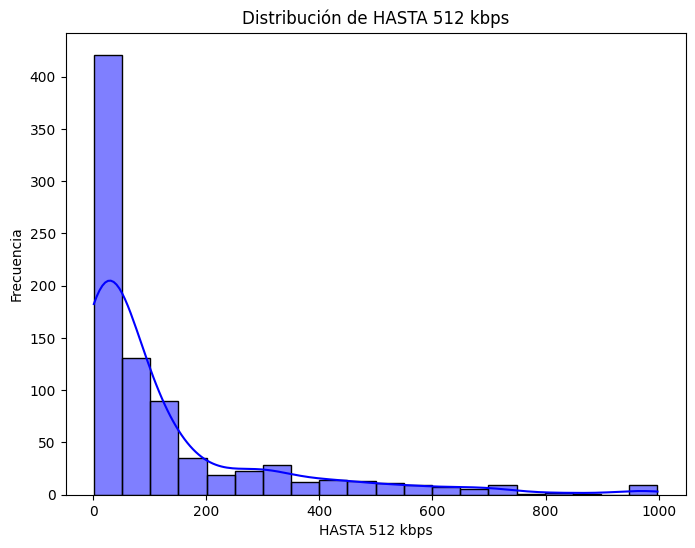

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetAcc, x='HASTA 512 kbps', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de HASTA 512 kbps')
plt.xlabel('HASTA 512 kbps')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

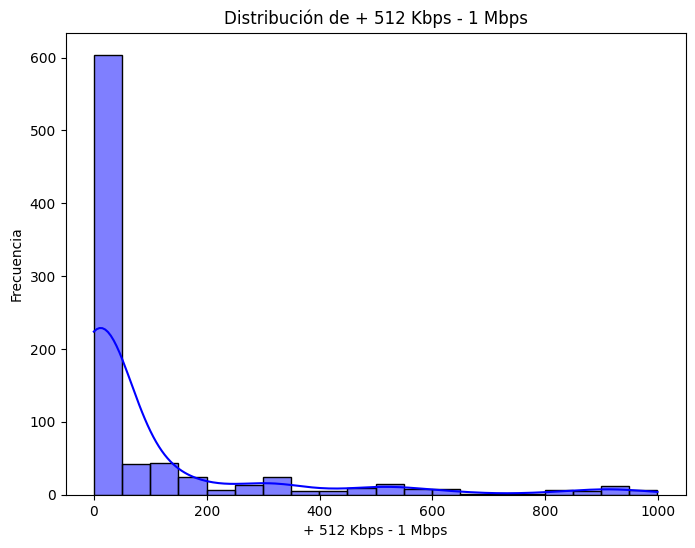

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetAcc, x='+ 512 Kbps - 1 Mbps', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de + 512 Kbps - 1 Mbps')
plt.xlabel('+ 512 Kbps - 1 Mbps')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

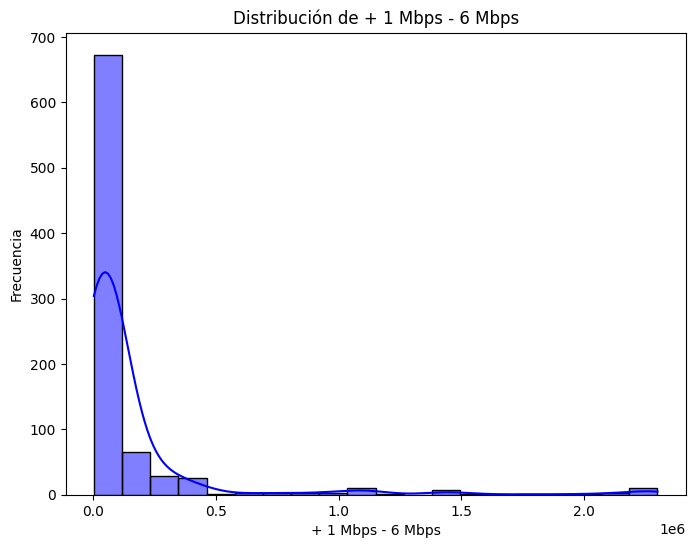

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetAcc, x='+ 1 Mbps - 6 Mbps', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de + 1 Mbps - 6 Mbps')
plt.xlabel('+ 1 Mbps - 6 Mbps')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

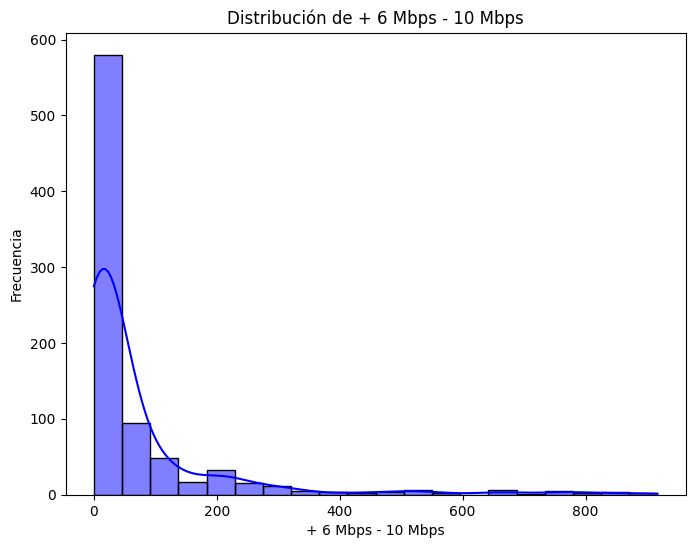

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetAcc, x='+ 6 Mbps - 10 Mbps', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de + 6 Mbps - 10 Mbps')
plt.xlabel('+ 6 Mbps - 10 Mbps')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

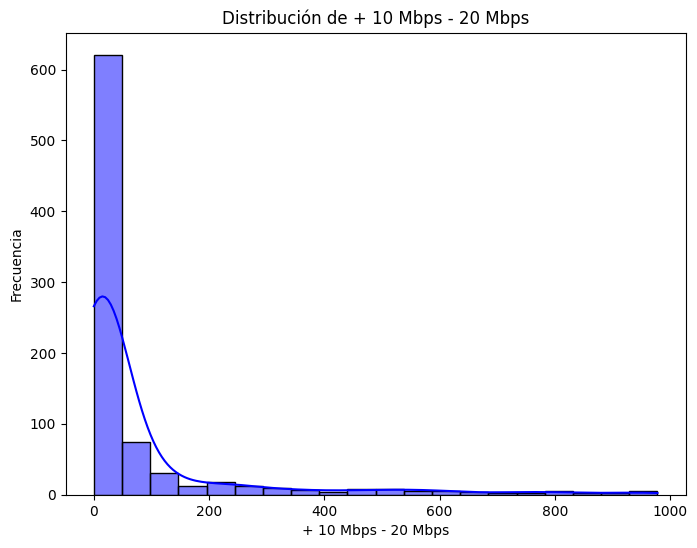

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetAcc, x='+ 10 Mbps - 20 Mbps', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de + 10 Mbps - 20 Mbps')
plt.xlabel('+ 10 Mbps - 20 Mbps')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

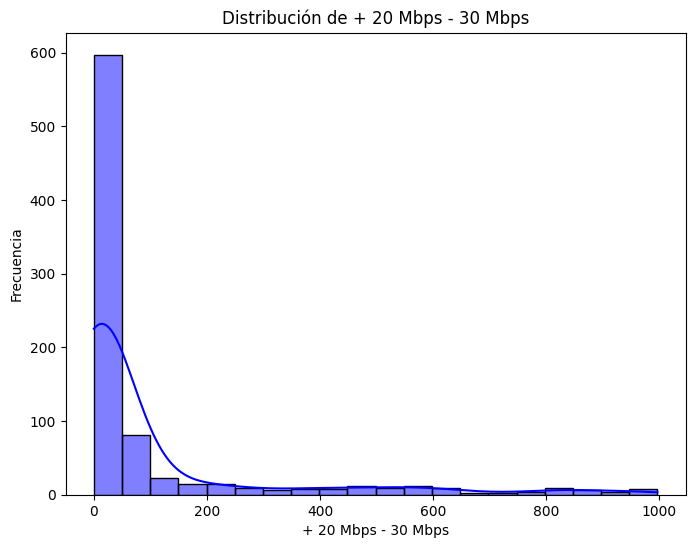

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetAcc, x='+ 20 Mbps - 30 Mbps', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de + 20 Mbps - 30 Mbps')
plt.xlabel('+ 20 Mbps - 30 Mbps')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

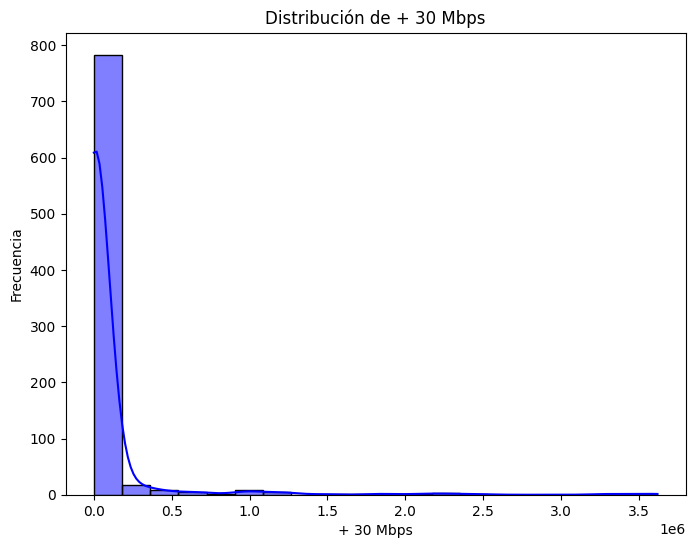

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetAcc, x='+ 30 Mbps', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de + 30 Mbps')
plt.xlabel('+ 30 Mbps')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

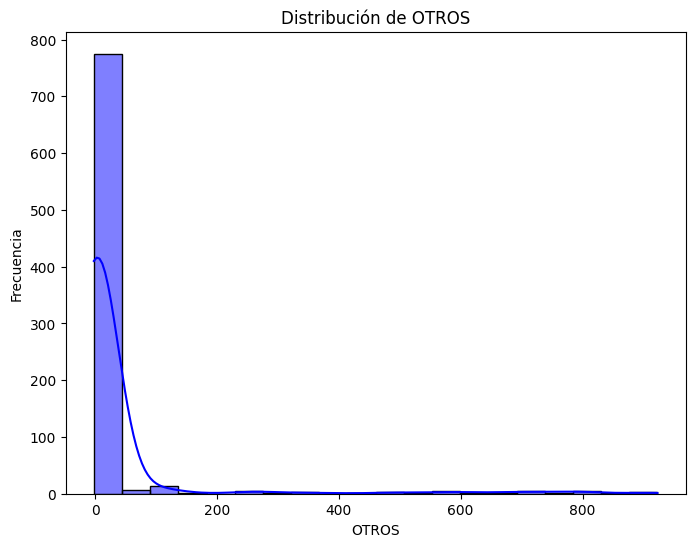

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetAcc, x='OTROS', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de OTROS')
plt.xlabel('OTROS')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

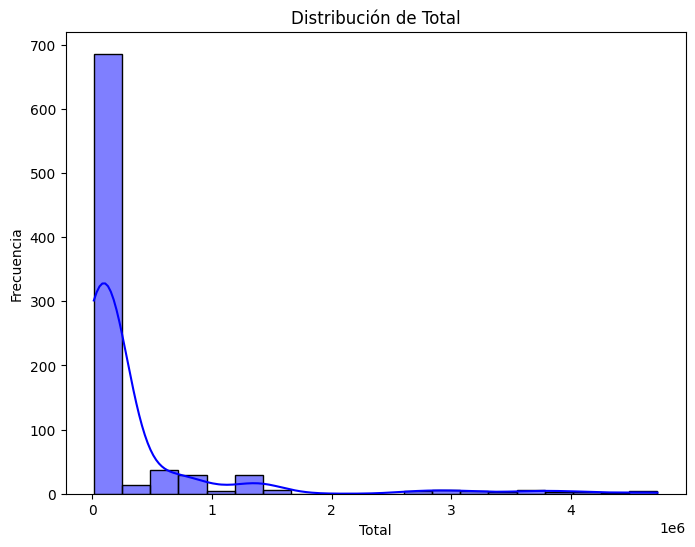

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetAcc, x='Total', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Total')
plt.xlabel('Total')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

> En el dataset anterior podemos observar los datos para el año, trimestre, provincia, rangos de velocidad de internet medidos en megabits por Segundo (Mbps) y kilobits por segundo (Kbps), el comportamiento de los datos No corresponde a una distribucion normal y la unica columna que presenta valores nan es la columna Total con menos de un 1 % de valores perdidos.

# **Resumen Estadístico**

In [ ]:
#Analisis estadístico las variables númericas
analisis = InternetAcc.describe(include=[np.number])
round(analisis,0)

,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,840.0,840.0,840.0,840.0,840.0,840.0,840.0,834.0,840.0
mean,126.0,102.0,150970.0,71.0,80.0,101.0,79180.0,33.0,343989.0
std,188.0,207.0,348154.0,140.0,171.0,209.0,342623.0,129.0,737337.0
min,1.0,0.0,2842.0,0.0,0.0,0.0,0.0,-2.0,12406.0
25%,10.0,3.0,28539.0,5.0,5.0,2.0,7.0,0.0,52328.0
50%,50.0,9.0,48834.0,20.0,15.0,11.0,882.0,0.0,104333.0
75%,134.0,84.0,86898.0,62.0,55.0,64.0,19661.0,7.0,177580.0
max,998.0,999.0,2299705.0,917.0,978.0,997.0,3618689.0,923.0,4721668.0


In [ ]:
#Analisis de las MTC de las variables categoricas
InternetAcc.describe(include=object)

,Año,Trimestre,Provincia
count,840,840,840
unique,9,4,24
top,2021,3,Buenos Aires
freq,96,216,35


> En el análisis estadístico anterior se observa que los datos poseen una desviación estandar significativa lo que indica que los datos se encuentran bastante dispersos en algunos casos. Por otra parte, es posible observar los valores de la media, minímo, maxímo, los cuartiles y la cantidad de datos presentes en el data set.

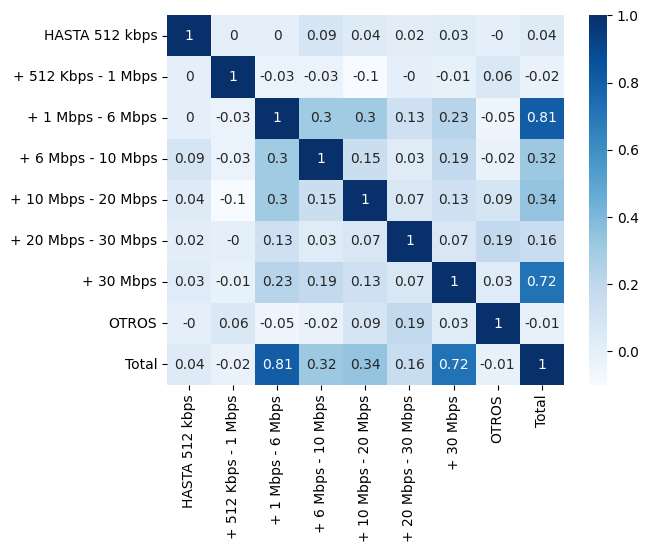

In [ ]:
corr = InternetAcc.corr ()

sns.heatmap(round(corr,2), cmap='Blues', annot=True);

> En el mapa de calor anterior se observa que la mayoria de las velocidades presentan una correlación baja, aunque algunas presentan una correlacion fuerte con la columna _Total_.

In [7]:
InternetProv= pd.read_csv('datos/Internet_BAF Prov.csv')

In [8]:
InternetProv['Banda ancha fija'] = InternetProv['Banda ancha fija'].str.replace('.', '').astype(float)

In [9]:
InternetProv['Total'] = InternetProv['Total'].str.replace('.', '').astype(float)

In [10]:
InternetProv['Año'] = InternetProv['Año'].astype(str)

In [11]:
InternetProv['Trimestre'] = InternetProv['Trimestre'].astype(str)

In [12]:
#informacion general
InternetProv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               840 non-null    object 
 1   Trimestre         840 non-null    object 
 2   Provincia         840 non-null    object 
 3   Banda ancha fija  840 non-null    float64
 4   Dial up           838 non-null    object 
 5   Total             840 non-null    float64
dtypes: float64(2), object(4)
memory usage: 39.5+ KB


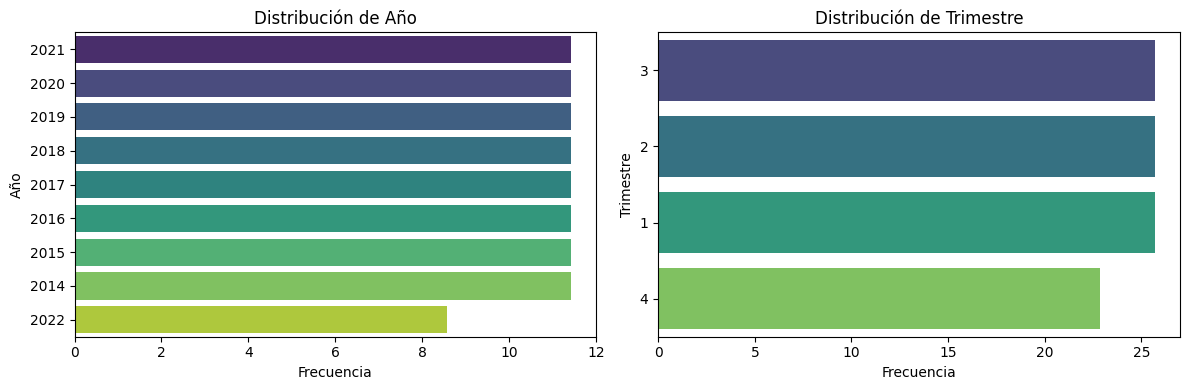

In [134]:
# Calcula las frecuencias relativas para el primer gráfico
frec_relativa_año = 100 * InternetProv['Año'].value_counts() / len(InternetProv['Año'])

# Calcula las frecuencias relativas para el segundo gráfico
frec_relativa_trimestre = 100 * InternetProv['Trimestre'].value_counts() / len(InternetProv['Trimestre'])

# Crea la matriz de gráficos
plt.figure(figsize=(12, 4))

# Primer gráfico en la primera posición (1, 1)
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=frec_relativa_año.index, x=frec_relativa_año.values, palette="viridis")
plt.title('Distribución de Año')
plt.xlabel('Frecuencia')
plt.ylabel('Año')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Segundo gráfico en la segunda posición (1, 2)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=frec_relativa_trimestre.index, x=frec_relativa_trimestre.values, palette="viridis")
plt.title('Distribución de Trimestre')
plt.xlabel('Frecuencia')
plt.ylabel('Trimestre')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


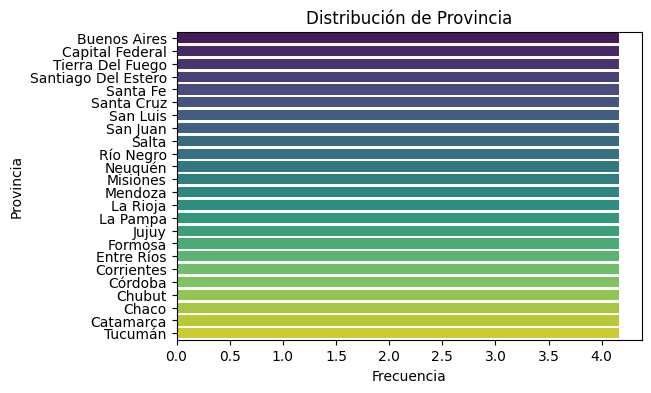

In [ ]:
# Calcula las frecuencias relativas
frec_relativa = 100 * InternetProv['Provincia'].value_counts() / len(InternetProv['Provincia'])

# Crea el gráfico utilizando Seaborn
plt.figure(figsize=(6, 4))
ax = sns.barplot(y=frec_relativa.index, x=frec_relativa.values, palette="viridis")  # Intercambia y y x

# Configura los títulos y etiquetas
plt.title('Distribución de Provincia')
plt.xlabel('Frecuencia')  # Los ejes se invierten, por lo que se cambian los labels
plt.ylabel('Provincia')  # Los ejes se invierten, por lo que se cambian los labels

# Gira los labels en el eje y (anteriormente x)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Muestra el gráfico
plt.show()

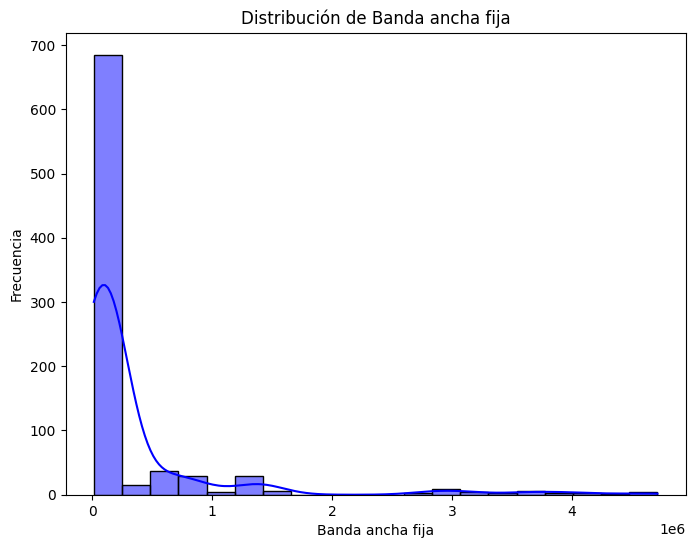

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetProv, x='Banda ancha fija', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Banda ancha fija')
plt.xlabel('Banda ancha fija')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

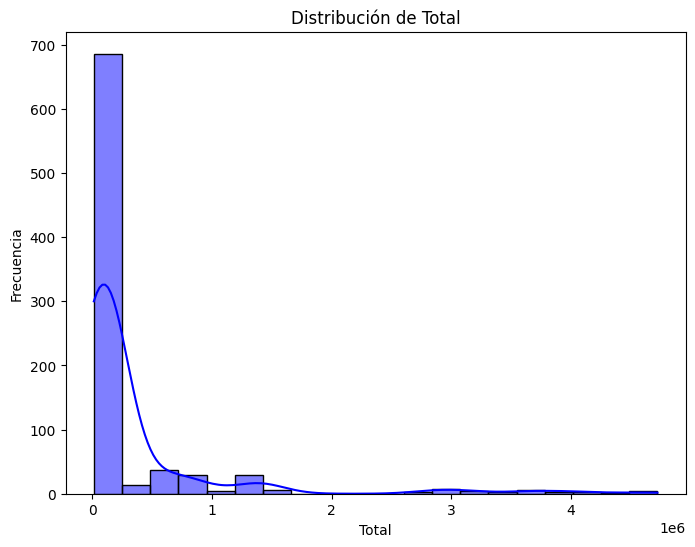

In [ ]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=InternetProv, x='Total', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Total')
plt.xlabel('Total')
plt.ylabel('Frecuencia')

# Muestra el gráficoTotal
plt.show()

> El dataset anterior contiene informacion del año, trimestre, provincia, banda ancha fija, contiene valores perdidos en Dial up, los datos numéricos no corresponden a una distribución normal.

# **Resumen Estadístico**

In [ ]:
#Analisis estadístico las variables númericas
analisis = InternetProv.describe(include=[np.number])
round(analisis,0)

,Banda ancha fija,Total
count,840.0,840.0
mean,344767.0,345742.0
std,740050.0,741944.0
min,12193.0,12557.0
25%,51922.0,52030.0
50%,102936.0,103490.0
75%,177868.0,177915.0
max,4715469.0,4721668.0


In [ ]:
#Analisis de las MTC de las variables categoricas
InternetProv.describe(include=object)

,Año,Trimestre,Provincia,Dial up
count,840,840,840,838
unique,9,4,24,307
top,2021,3,Buenos Aires,- 0
freq,96,216,35,59


>De acuerdo con el análisis estadístico anterior notamos que el año que aparece es 2021, también aparecen los datos para la desviación estándar de cada variable numérica y los cuartiles, por otra parte se observa que los datos presentan una dispersión alta como se aprecia en la medida de la desviación estandar.

In [13]:
Internet_BAF = pd.read_csv('datos/Internet_BAF.csv')

In [8]:
Internet_BAF['Trimestre'] = Internet_BAF['Trimestre'].astype(str)

In [9]:
Internet_BAF['Año'] = Internet_BAF['Año'].astype(str)

In [5]:
Internet_BAF['Banda ancha fija'] = Internet_BAF['Banda ancha fija'].str.replace('.', '').astype(float)

In [6]:
Internet_BAF['Total'] = Internet_BAF['Total'].str.replace('.', '').astype(float)

In [10]:
#informacion general
Internet_BAF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     object 
 1   Trimestre         35 non-null     object 
 2   Banda ancha fija  35 non-null     float64
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     float64
 5   Periodo           35 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.8+ KB


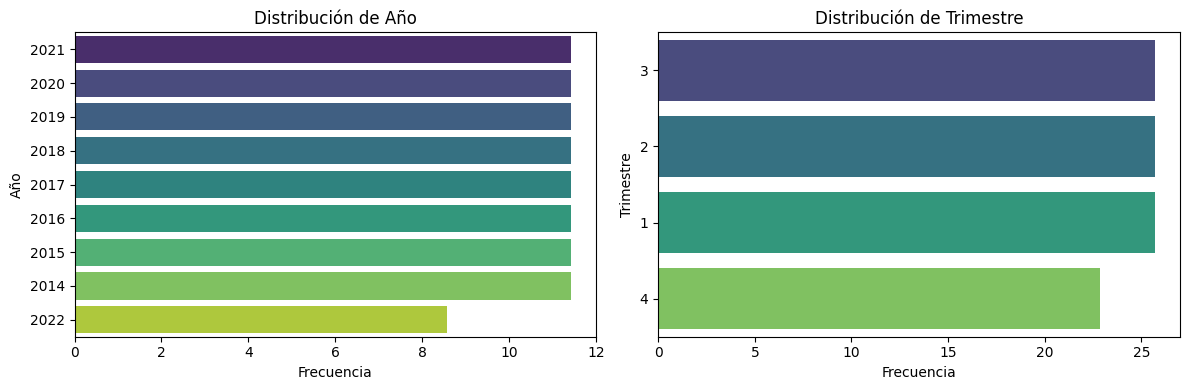

In [125]:
# Calcula las frecuencias relativas para el primer gráfico
frec_relativa_año = 100 * Internet_BAF['Año'].value_counts() / len(Internet_BAF['Año'])

# Calcula las frecuencias relativas para el segundo gráfico
frec_relativa_trimestre = 100 * Internet_BAF['Trimestre'].value_counts() / len(Internet_BAF['Trimestre'])

# Crea la matriz de gráficos
plt.figure(figsize=(12, 4))

# Primer gráfico en la primera posición (1, 1)
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=frec_relativa_año.index, x=frec_relativa_año.values, palette="viridis")
plt.title('Distribución de Año')
plt.xlabel('Frecuencia')
plt.ylabel('Año')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Segundo gráfico en la segunda posición (1, 2)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=frec_relativa_trimestre.index, x=frec_relativa_trimestre.values, palette="viridis")
plt.title('Distribución de Trimestre')
plt.xlabel('Frecuencia')
plt.ylabel('Trimestre')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


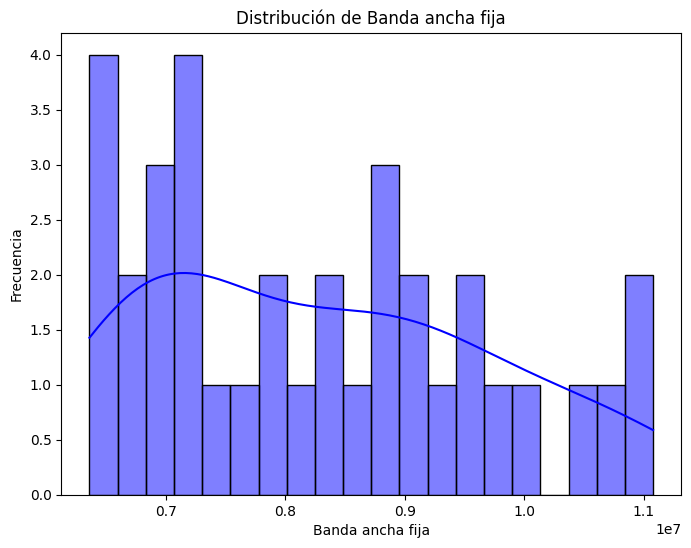

In [16]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=Internet_BAF, x='Banda ancha fija', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Banda ancha fija')
plt.xlabel('Banda ancha fija')
plt.ylabel('Frecuencia')

# Muestra el gráficoTotal
plt.show()

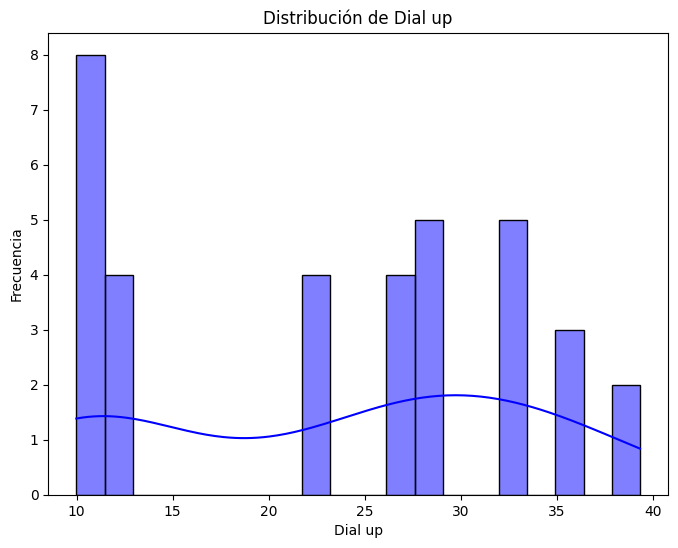

In [17]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=Internet_BAF, x='Dial up', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Dial up')
plt.xlabel('Dial up')
plt.ylabel('Frecuencia')

# Muestra el gráficoTotal
plt.show()

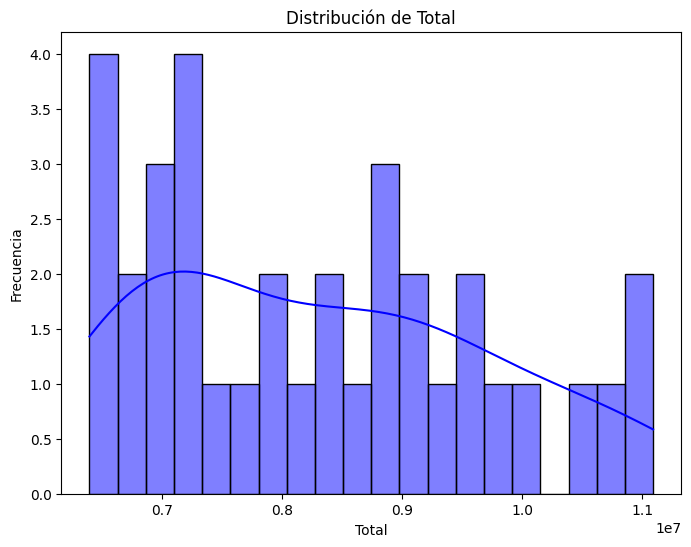

In [18]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=Internet_BAF, x='Total', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Total')
plt.xlabel('Total')
plt.ylabel('Frecuencia')

# Muestra el gráficoTotal
plt.show()

>  El dataset anterior contiene información del año, trimestre, banda ancha fija, Total que es la suma de Dial up y Banda Ancha No contiene valores perdidos, los datos No se comportan de forma normal.

# **Resumen Estadístico**

In [19]:
#Analisis estadístico las variables númericas
analisis = Internet_BAF.describe(include=[np.number])
round(analisis,0)

,Banda ancha fija,Dial up,Total
count,35.0,35.0,35.0
mean,8274417.0,23.0,8297800.0
std,1408774.0,10.0,1399611.0
min,6362108.0,10.0,6398398.0
25%,7024946.0,12.0,7057455.0
50%,8083533.0,27.0,8110444.0
75%,9244537.0,33.0,9260442.0
max,11078691.0,39.0,11091128.0


In [20]:
#Analisis de las MTC de las variables categoricas
Internet_BAF.describe(include=object)

,Año,Trimestre,Periodo
count,35,35,35
unique,9,4,35
top,2021,3,Jul-Sept 2022
freq,4,9,1


> Al examinar el análisis estadístico previo, se destaca que los datos proporcionados exhiben una desviación estándar significativamente alta. Esto sugiere una notable dispersión en los valores, lo que implica que los datos se encuentran ampliamente distribuidos en relación con la media.

>Además, en las tablas presentadas anteriormente, se puede observar que las variables cuantitativas muestran un rango diverso de valores, abarcando desde los valores mínimos hasta los máximos. Esta amplitud en el rango subraya la variabilidad en los datos.

>Asimismo, es evidente que la mayoría de los datos corresponden al año 2021, lo que indica que este período en particular ha sido ampliamente registrado en los conjuntos de datos proporcionados.

In [14]:
Internet_Ingresos= pd.read_csv('datos/Internet_Ingresos.csv', sep=',')

In [15]:
Internet_Ingresos['Año'] = Internet_Ingresos['Año'].astype(str)

In [16]:
Internet_Ingresos['Trimestre'] = Internet_Ingresos['Trimestre'].astype(str)

In [17]:
Internet_Ingresos['Ingresos (miles de pesos)'] = Internet_Ingresos['Ingresos (miles de pesos)'].str.replace('.', '').astype(float)

In [18]:
#informacion general
Internet_Ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        35 non-null     object 
 1   Trimestre                  35 non-null     object 
 2   Ingresos (miles de pesos)  35 non-null     float64
 3   Periodo                    35 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


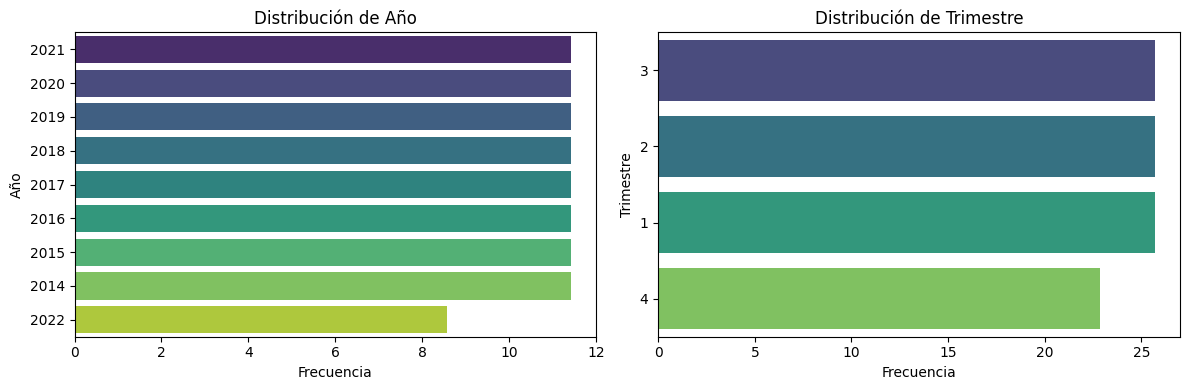

In [126]:
# Calcula las frecuencias relativas para el primer gráfico
frec_relativa_año = 100 * Internet_Ingresos['Año'].value_counts() / len(Internet_Ingresos['Año'])

# Calcula las frecuencias relativas para el segundo gráfico
frec_relativa_trimestre = 100 * Internet_Ingresos['Trimestre'].value_counts() / len(Internet_Ingresos['Trimestre'])

# Crea la matriz de gráficos
plt.figure(figsize=(12, 4))

# Primer gráfico en la primera posición (1, 1)
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=frec_relativa_año.index, x=frec_relativa_año.values, palette="viridis")
plt.title('Distribución de Año')
plt.xlabel('Frecuencia')
plt.ylabel('Año')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Segundo gráfico en la segunda posición (1, 2)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=frec_relativa_trimestre.index, x=frec_relativa_trimestre.values, palette="viridis")
plt.title('Distribución de Trimestre')
plt.xlabel('Frecuencia')
plt.ylabel('Trimestre')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


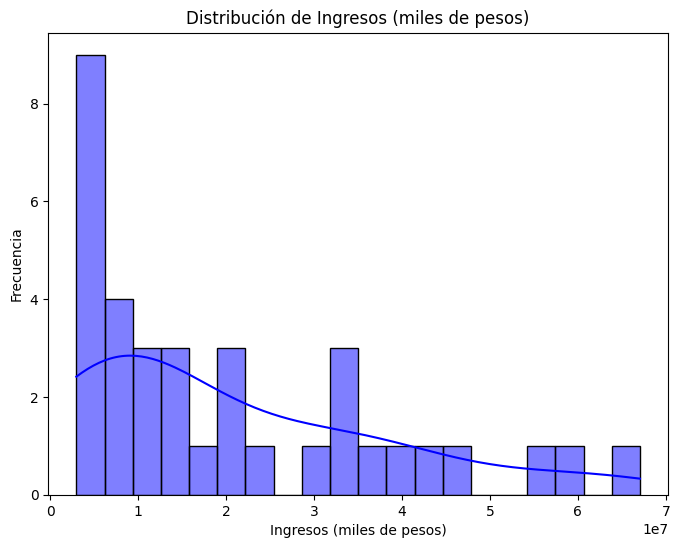

In [33]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=Internet_Ingresos, x='Ingresos (miles de pesos)', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Ingresos (miles de pesos)')
plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

> El dataset anterior contiene información del año, trimestre, ingresos (miles de pesos) y periodo, en general, los datos No se distribuyen de forma normal, adicionalmente el conjunto de datos no posee datos nulos.

# **Resumen Estadístico**

In [34]:
#Analisis estadístico las variables númericas
analisis = Internet_Ingresos.describe(include=[np.number])
round(analisis,0)

,Ingresos (miles de pesos)
count,35.0
mean,20588449.0
std,17742138.0
min,2984054.0
25%,6235543.0
50%,14319467.0
75%,32049960.0
max,67055930.0


In [35]:
#Analisis de las MTC de las variables categoricas
Internet_Ingresos.describe(include=object)

,Año,Trimestre,Periodo
count,35,35,35
unique,9,4,35
top,2021,3,Jul-Sept 2022
freq,4,9,1


> En el análisis estadístico previo, hemos identificado que los ingresos (expresados en miles de pesos) presentan una desviación estándar significativamente alta, lo que sugiere una notable variabilidad en los valores. Además, hemos examinado otras medidas estadísticas fundamentales, tales como el valor máximo, mínimo y los cuartiles, para esta variable en particular.

>Por otro lado, hemos vuelto a constatar que el año 2021 es el que cuenta con la mayor cantidad de registros en los datos analizados. En este sentido, se han registrado datos para los cuatro trimestres y se han observado años únicos en el conjunto de datos.

>Este análisis proporciona una visión más profunda de las características y tendencias presentes en los datos de ingresos, lo cual es fundamental para comprender su comportamiento y variabilidad a lo largo del tiempo.

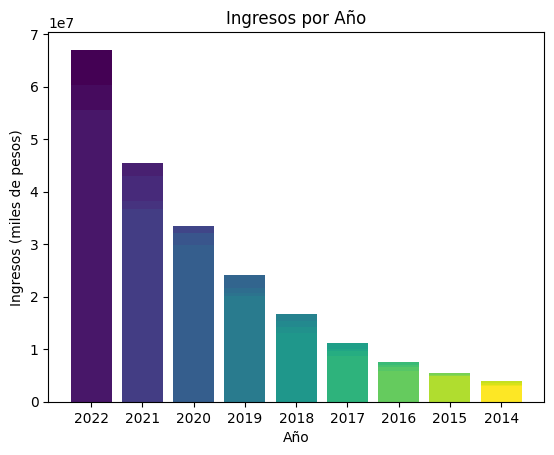

In [36]:
# Obtener los valores del DataFrame
años = Internet_Ingresos['Año']
ingresos = Internet_Ingresos['Ingresos (miles de pesos)']

# Crear una paleta de colores
colores = plt.cm.viridis(np.linspace(0, 1, len(años)))

# Crear la gráfica de barras con colores variables
plt.bar(años, ingresos, color=colores)

# Establecer etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')

# Establecer título del gráfico
plt.title('Ingresos por Año')

# Mostrar la gráfica
plt.show()


> En la gráfica anterior se observa que los ingresos han venido aumentado a medida de transcurre el tiempo.

In [19]:
Internet_Penetracion = pd.read_csv('datos/Internet_Penetracion.csv', sep=',')

In [20]:
Internet_Penetracion['Año'] = Internet_Penetracion['Año'].astype(str)

In [54]:
Internet_Penetracion['Trimestre'] = Internet_Penetracion['Trimestre'].astype(str)

In [50]:
Internet_Penetracion['Accesos por cada 100 hogares'] = Internet_Penetracion['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)

In [51]:
Internet_Penetracion['Accesos por cada 100 hab'] = Internet_Penetracion['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)

In [55]:
#informacion general
Internet_Penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     object 
 1   Trimestre                     35 non-null     object 
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.5+ KB


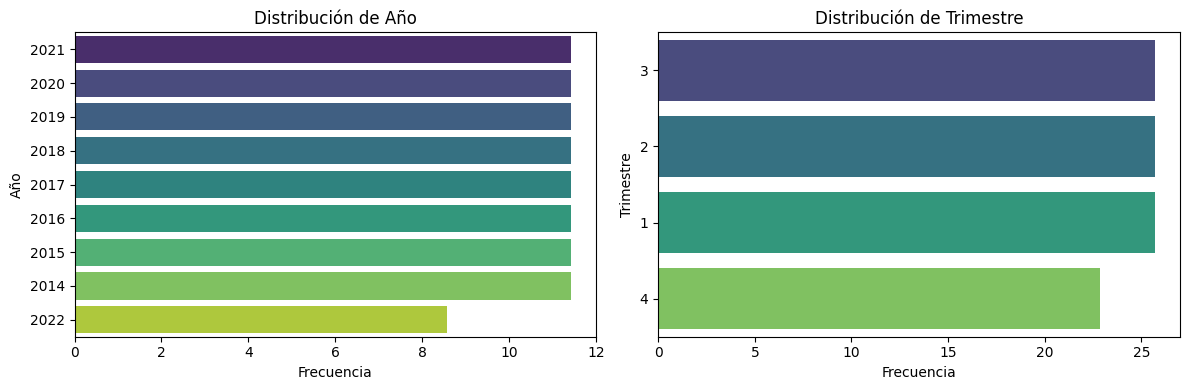

In [127]:
# Calcula las frecuencias relativas para el primer gráfico
frec_relativa_año = 100 * Internet_Penetracion['Año'].value_counts() / len(Internet_Penetracion['Año'])

# Calcula las frecuencias relativas para el segundo gráfico
frec_relativa_trimestre = 100 * Internet_Penetracion['Trimestre'].value_counts() / len(Internet_Penetracion['Trimestre'])

# Crea la matriz de gráficos
plt.figure(figsize=(12, 4))

# Primer gráfico en la primera posición (1, 1)
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=frec_relativa_año.index, x=frec_relativa_año.values, palette="viridis")
plt.title('Distribución de Año')
plt.xlabel('Frecuencia')
plt.ylabel('Año')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Segundo gráfico en la segunda posición (1, 2)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=frec_relativa_trimestre.index, x=frec_relativa_trimestre.values, palette="viridis")
plt.title('Distribución de Trimestre')
plt.xlabel('Frecuencia')
plt.ylabel('Trimestre')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

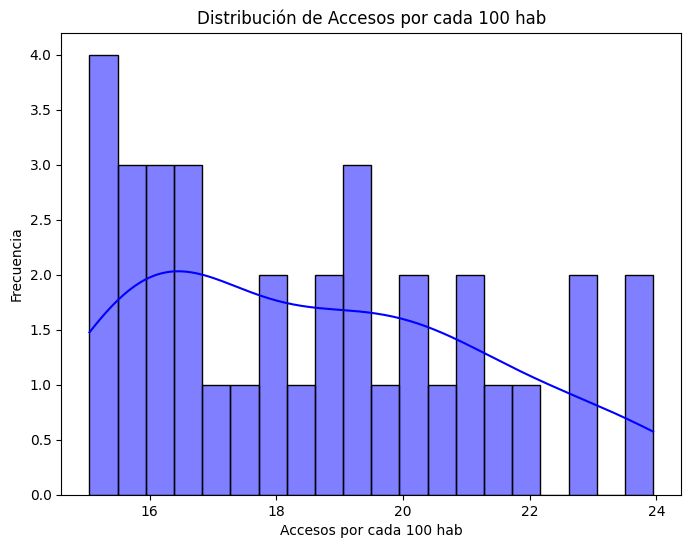

In [61]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=Internet_Penetracion, x='Accesos por cada 100 hab', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Accesos por cada 100 hab')
plt.xlabel('Accesos por cada 100 hab')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

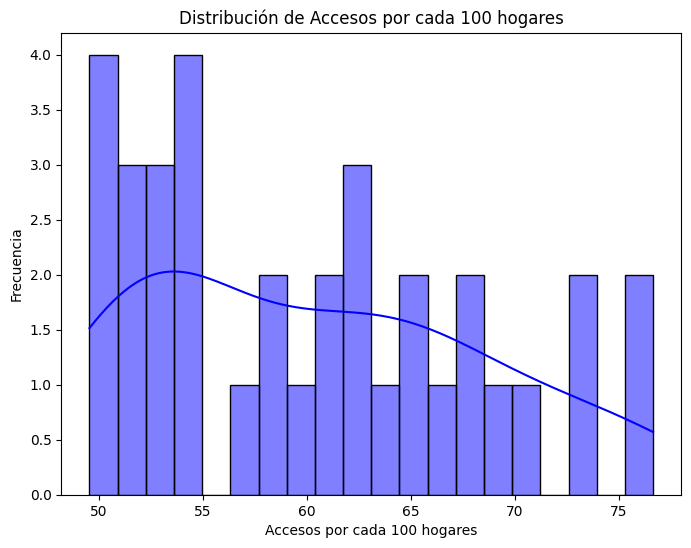

In [63]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=Internet_Penetracion, x='Accesos por cada 100 hogares', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

> El informe anterior nos muestra el acceso a internet por cada 100 habitantes y 100 hogares, ademas año y trimestre, no contiene valores perdidos o nan, los datos en general, no se distribuyen de forma normal.

# **Resumen Estadístico**

In [64]:
#Analisis estadístico las variables númericas
analisis = Internet_Penetracion.describe(include=[np.number])
round(analisis,0)

,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.0,35.0
mean,60.0,19.0
std,8.0,3.0
min,50.0,15.0
25%,53.0,16.0
50%,59.0,18.0
75%,66.0,20.0
max,77.0,24.0


In [65]:
#Analisis de las MTC de las variables categoricas
Internet_Penetracion.describe(include=object)

,Año,Trimestre,Periodo
count,35,35,35
unique,9,4,35
top,2021,3,Jul-Sept 2022
freq,4,9,1


>En el análisis estadístico anterior, se evidencia que los valores correspondientes al acceso a Internet por cada 100 hogares y habitantes presentan una desviación estándar que, en comparación con otros datos, no es considerablemente alta. Además, se pueden observar las medidas estadísticas clave, como los cuartiles, el valor máximo y mínimo, para estos registros específicos.

>Es relevante destacar que el conjunto de datos consta de 35 registros y se caracteriza por no contener valores nulos, lo que garantiza la integridad de los datos. En términos temporales, el año predominante en el conjunto de datos es 2021, con un enfoque particular en el tercer trimestre del año. Además, el período correspondiente a julio - septiembre de 2021 se encuentra bien representado en el conjunto de datos.

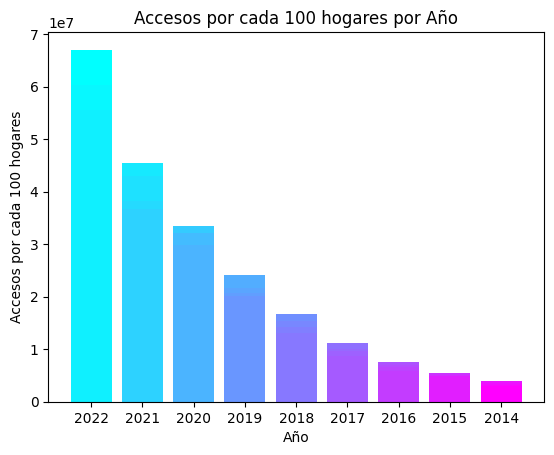

In [66]:
# Obtener los valores del DataFrame
años = Internet_Penetracion['Año']
accesoho = Internet_Penetracion['Accesos por cada 100 hogares']

# Crear una paleta de colores
colores = plt.cm.cool(np.linspace(0, 1, len(años)))

# Crear la gráfica de barras con colores variables
plt.bar(años, ingresos, color=colores)

# Establecer etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')

# Establecer título del gráfico
plt.title('Accesos por cada 100 hogares por Año')

# Mostrar la gráfica
plt.show()

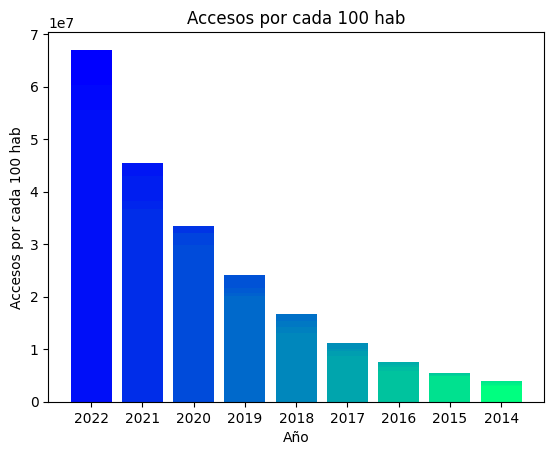

In [67]:
# Obtener los valores del DataFrame
años = Internet_Penetracion['Año']
accesoho = Internet_Penetracion['Accesos por cada 100 hab']

# Crear una paleta de colores
colores = plt.cm.winter(np.linspace(0, 1, len(años)))

# Crear la gráfica de barras con colores variables
plt.bar(años, ingresos, color=colores)

# Establecer etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')

# Establecer título del gráfico
plt.title('Accesos por cada 100 hab')

# Mostrar la gráfica
plt.show()

> Para el caso del acceso por cada 100 hogares y 100 habitantes a medida que trascurre el tiempo, es claro que estas variables aumentan con el paso del tiempo.

In [4]:
Lista_Loca = pd.read_csv('datos/Listadodelocalidadesconconectividadainternet.csv', sep =',')

In [5]:
#informacion general
Lista_Loca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   ADSL           4312 non-null   object
 4   CABLEMODEM     4312 non-null   object
 5   DIALUP         4312 non-null   object
 6   FIBRAOPTICA    4312 non-null   object
 7   4G             4312 non-null   object
 8   3G             4312 non-null   object
 9   TELEFONIAFIJA  4312 non-null   object
 10  WIRELESS       4312 non-null   object
 11  SATELITAL      4312 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


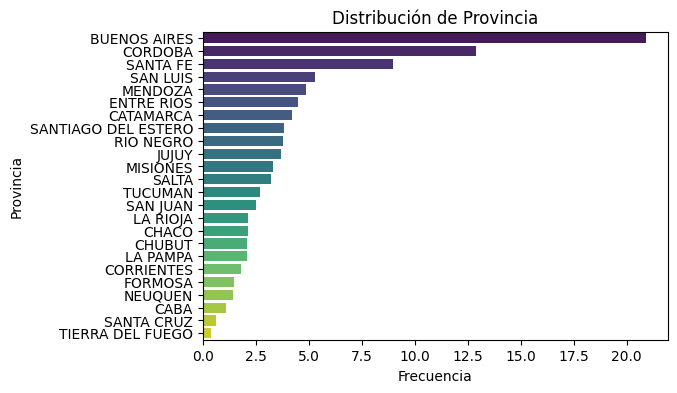

In [6]:
# Calcula las frecuencias relativas
frec_relativa = 100 * Lista_Loca['Provincia'].value_counts() / len(Lista_Loca['Provincia'])

# Crea el gráfico utilizando Seaborn
plt.figure(figsize=(6, 4))
ax = sns.barplot(y=frec_relativa.index, x=frec_relativa.values, palette="viridis")  # Intercambia y y x

# Configura los títulos y etiquetas
plt.title('Distribución de Provincia')
plt.xlabel('Frecuencia')  # Los ejes se invierten, por lo que se cambian los labels
plt.ylabel('Provincia')  # Los ejes se invierten, por lo que se cambian los labels

# Gira los labels en el eje y (anteriormente x)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Muestra el gráfico
plt.show()

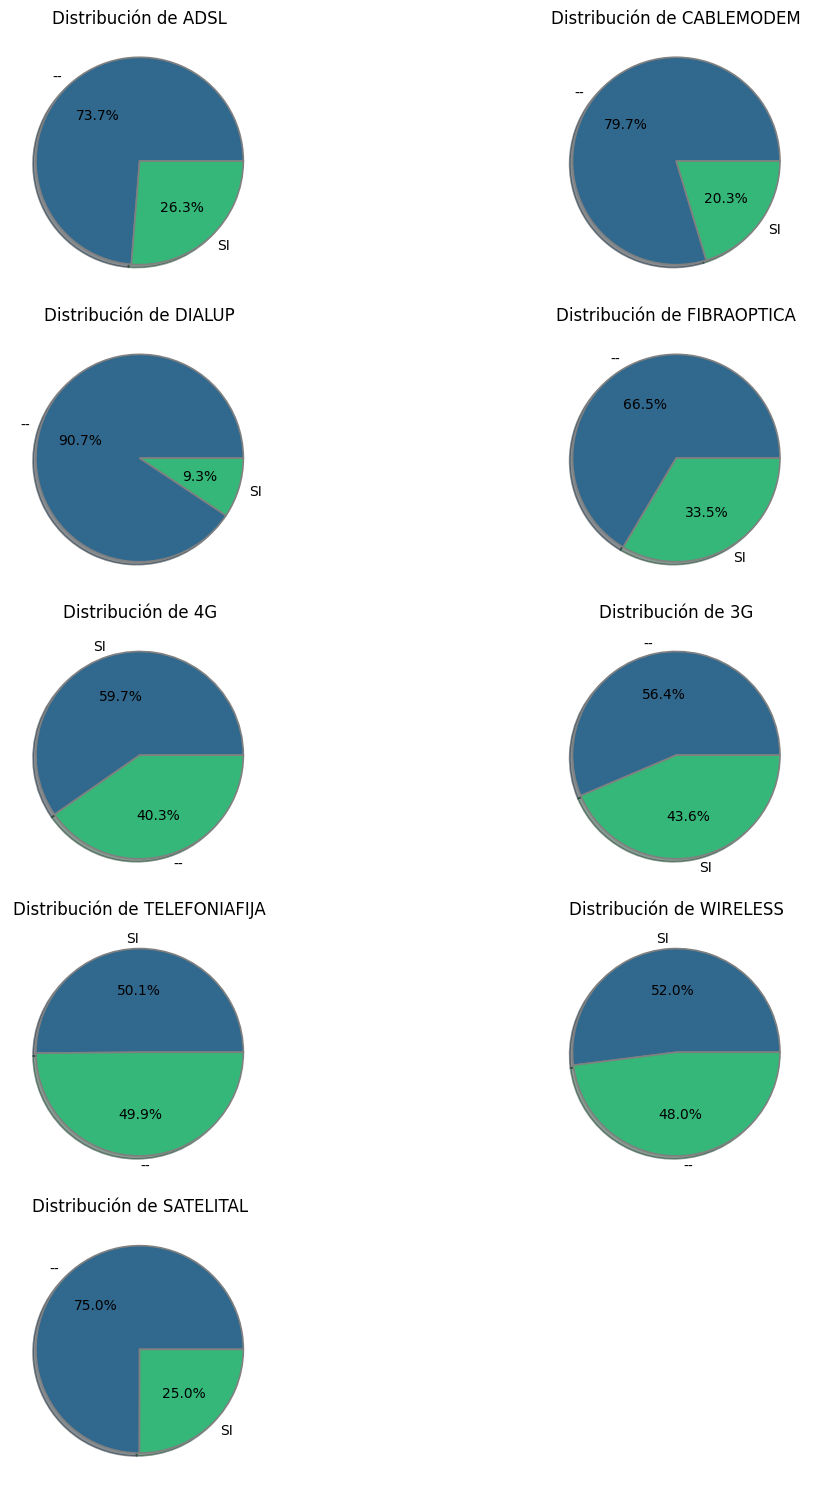

In [13]:
# Nombres de las columnas para las gráficas
columnas = ['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']

# Crea la matriz de gráficos
plt.figure(figsize=(12, 15))

# Itera sobre las columnas para crear los diagramas circulares
for i, columna in enumerate(columnas, 1):
    plt.subplot(5, 2, i)  # 5 filas, 2 columnas, posición actual
    frec_relativa = 100 * Lista_Loca[columna].value_counts() / len(Lista_Loca[columna])
    pie_colors = sns.color_palette("viridis", len(frec_relativa))
    plt.pie(frec_relativa, labels=frec_relativa.index, autopct='%1.1f%%', colors=pie_colors,
            wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2}, shadow=True)
    plt.title(f'Distribución de {columna}')

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


> El datset anterior contiene información de la provincia, partido, localidad, tecnologias de acceso a internet (ADSL, Cablemodem, Dial up, FibraOptica, 4G, 3G, telefonía fija, wireless, satelital), todas estas variables cualitativas.

# **Resumen Estadístico**

In [82]:
#Analisis de las MTC de las variables categoricas
Lista_Loca.describe(include=object)

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
count,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,SI,--,SI,SI,--
freq,901,85,12,3179,3436,3909,2866,2574,2432,2162,2242,3233


>De acuerdo con el análisis anterior las provincias que más posee registros es Buenos Aires, el Partido que más aparece es General Roca y la Localidad San Pedro, el conjunto de datos no posee valores perdidos.

In [95]:
Historico = pd.read_csv('/content/drive/MyDrive/Proyecto3/historico_velocidad_internet.csv', sep =',')

In [96]:
Historico['Año'] = Historico['Año'].astype(str)

In [97]:
Historico['Trimestre'] = Historico['Trimestre'].astype(str)

In [98]:
Historico.rename(columns={'Trimestre.1': 'Periodo'}, inplace=True)

In [99]:
Historico['Mbps (Media de bajada)'] = Historico['Mbps (Media de bajada)'].str.replace(',', '.').astype(float)

In [100]:
#informacion general
Historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     35 non-null     object 
 1   Trimestre               35 non-null     object 
 2   Mbps (Media de bajada)  35 non-null     float64
 3   Periodo                 35 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


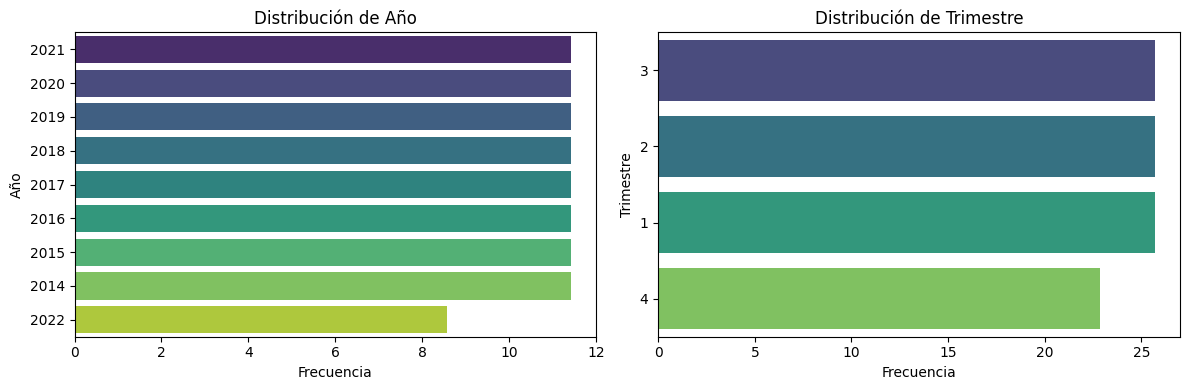

In [106]:
# Calcula las frecuencias relativas para el primer gráfico
frec_relativa_año = 100 * Historico['Año'].value_counts() / len(Historico['Año'])

# Calcula las frecuencias relativas para el segundo gráfico
frec_relativa_trimestre = 100 * Historico['Trimestre'].value_counts() / len(Historico['Trimestre'])

# Crea la matriz de gráficos
plt.figure(figsize=(12, 4))

# Primer gráfico en la primera posición (1, 1)
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=frec_relativa_año.index, x=frec_relativa_año.values, palette="viridis")
plt.title('Distribución de Año')
plt.xlabel('Frecuencia')
plt.ylabel('Año')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Segundo gráfico en la segunda posición (1, 2)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=frec_relativa_trimestre.index, x=frec_relativa_trimestre.values, palette="viridis")
plt.title('Distribución de Trimestre')
plt.xlabel('Frecuencia')
plt.ylabel('Trimestre')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


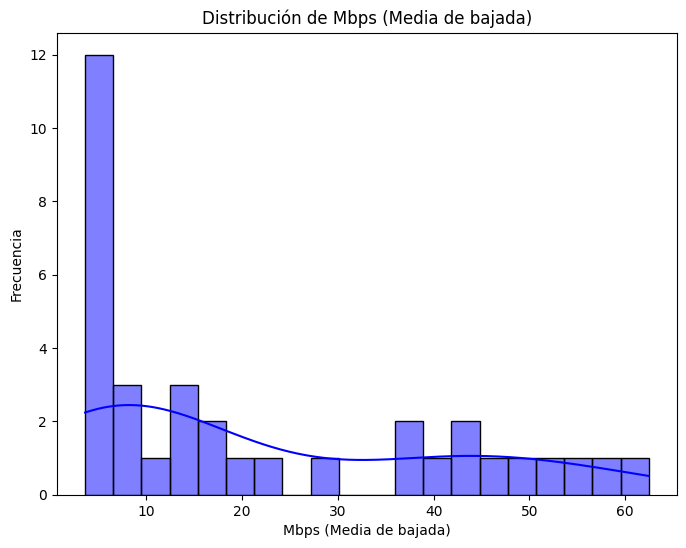

In [103]:
# Crea el histograma utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=Historico, x='Mbps (Media de bajada)', bins=20, kde=True, color='blue')

# Configura los títulos y etiquetas
plt.title('Distribución de Mbps (Media de bajada)')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

> El dataset anterior contiene información del año, periodo, velocidad media de bajada  medida en megabits por Segundo (Mbps), los datos no se distribuyen de forma normal.

# **Resumen Estadístico**

In [104]:
#Analisis estadístico las variables númericas
analisis = Historico.describe(include=[np.number])
round(analisis,0)

,Mbps (Media de bajada)
count,35.0
mean,22.0
std,19.0
min,4.0
25%,5.0
50%,14.0
75%,39.0
max,62.0


In [105]:
#Analisis de las MTC de las variables categoricas
Historico.describe(include=object)

,Año,Trimestre,Periodo
count,35,35,35
unique,9,4,35
top,2021,3,Jul-Sept 2022
freq,4,9,1


> En el análisis estadístico previo, es evidente que la desviación estándar de la variable que mide la velocidad en Mbps (en bajada) no es significativamente alta, presentando un valor de 19. Además de este dato, se han identificado otras medidas estadísticas relevantes.

>En lo que respecta a las variables año, trimestre y período, los resultados son coherentes con los hallazgos previamente presentados.